In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#from sklearn.utils.validation import leverage_scores


In [6]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [7]:
ppp = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\ppp_dataframe.csv', 'rb'),
)

In [8]:
ppp.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,37919130.92
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,18503466.08
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,25776333.02
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4090793.64
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,59674735.79


# Simple Linear Regression

In [9]:
#Simple linear regression using Keith's suggested variables 
y = ppp['Number of Loans Received']
x = ppp[['March Employment Numbers', 'Self-Employment as % of Workforce']]

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=85)

In [11]:
#calculate our baseline model using mean of the target variable

from sklearn.metrics import r2_score

y_mean = np.mean(y1_train)

y_pred = np.full_like(y1_test, y_mean)

r2_baseline = r2_score(y1_test, y_pred)

r2_baseline

-0.004174649432518773

In [12]:
model_simple = LinearRegression().fit(X1_train, y1_train)

In [13]:
score = model_simple.score(X1_train, y1_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_simple.score(X1_test, y1_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.922
R-squared score of the model on the test set: 0.946


In [14]:
y1_pred = model_simple.predict(X1_test)
y1_test_array = y1_test.values.reshape(-1, 1)
y1_pred_array = y1_pred.reshape(-1, 1)
comparison = np.hstack((y1_pred_array, y1_test_array))
print(comparison[:10])

[[ 3727.17036151  3670.        ]
 [ 1415.59468485  1149.        ]
 [ 4769.73786559   535.        ]
 [11320.5032581  10827.        ]
 [ 1475.13581757  1260.        ]
 [ 4034.23496191  1947.        ]
 [ 1372.28492199   536.        ]
 [ 1283.61753482   506.        ]
 [ -405.8014171    321.        ]
 [  443.16861161   500.        ]]


it's weird that it's occasionally predicting negative values, but oh well...

In [15]:
f_values, p_values = f_regression(X1_train, y1_train)
for i, col_name in enumerate(X1_train.columns):
    print(f'{col_name}: p-value={p_values[i]:.4f}')

March Employment Numbers: p-value=0.0000
Self-Employment as % of Workforce: p-value=0.0084


This model is already amazing we love to see it 

In [16]:
#check the residuals etc. to make sure nothing funky is going on
#import statsmodels.api as sm

#Fit linear model to any dataset
model_simple2 = sm.OLS(y1_train,X1_train)
results = model_simple2.fit()

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external
cooks_d

(array([5.80136277e-05, 3.90871325e-06, 1.01303153e-05, 2.65803137e-05,
        1.17431492e-05, 6.55906828e-05, 3.09522373e-05, 7.64528082e-05,
        1.57910072e-04, 1.99321911e-04, 7.63964078e-05, 6.74829484e-05,
        2.30844037e-05, 3.34499398e-04, 9.20758537e-08, 2.45804045e+00,
        1.49512483e-03, 1.13027189e-05, 1.04107941e-04, 1.25941828e-04,
        5.99543946e-03, 2.74525310e-05, 5.41179487e-08, 1.18905871e-04,
        6.36021360e-05, 6.70037634e-05, 1.07250723e-05, 1.20657543e-03,
        4.12045522e-02, 2.30823092e-03, 1.04353310e-04, 1.71032202e-06,
        9.70699611e-05, 1.89331130e-04, 1.20035758e-05, 2.43731236e-04,
        3.72814133e-05, 9.83470618e-06, 7.29608298e-04, 2.04390064e-02,
        3.59506180e-05, 1.90809715e-04, 1.20197544e-05, 2.46809036e-05,
        6.35401800e-04, 1.66330514e-04, 1.30854955e-05, 1.35746055e-06,
        1.13324087e-05, 6.22752834e-06, 1.89320811e-06, 2.40981388e-04,
        1.45624186e-04, 3.65042657e-05, 3.24850215e-05, 5.884404

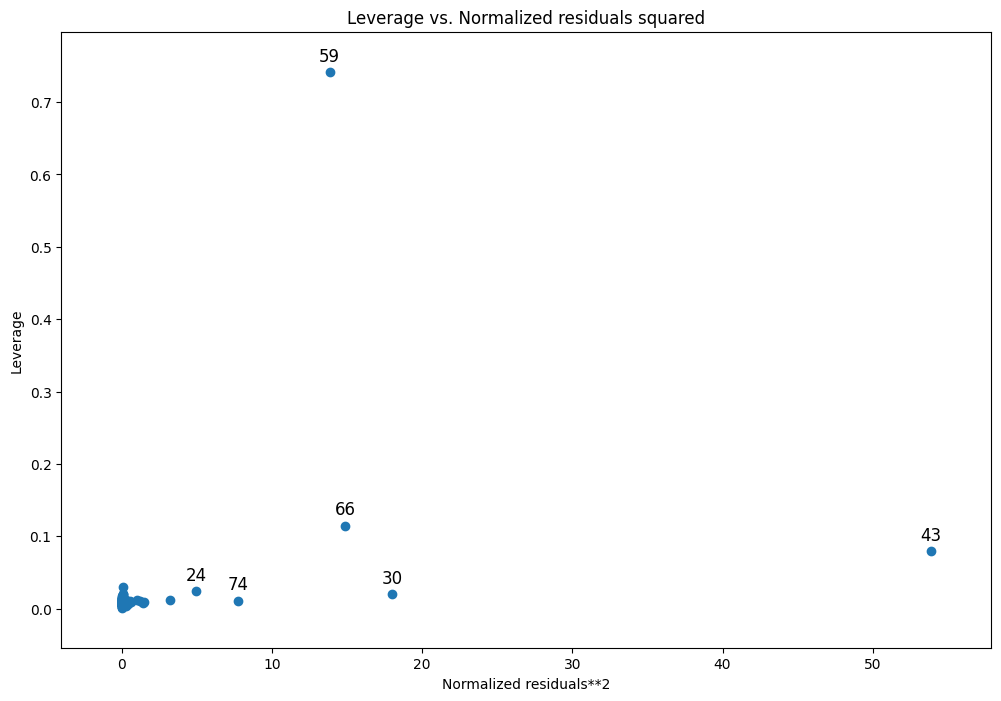

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)
plt.show()

No apparent outliers (59 is high leverage but still >1)

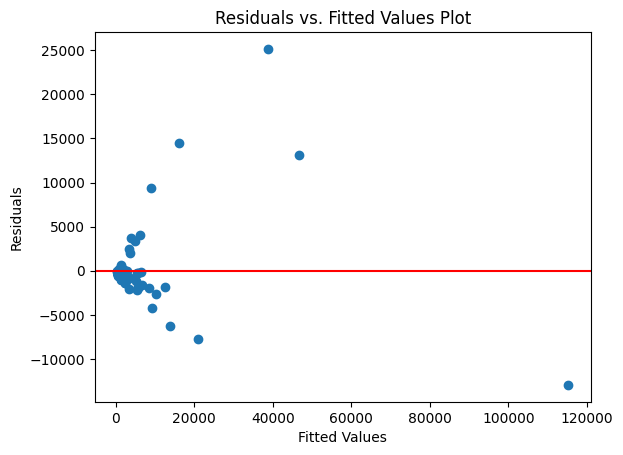

In [29]:
# Create a residuals vs. fitted values plot
y1_pred = results.predict(X1_train)
residuals = y1_train - y1_pred


fig, ax = plt.subplots()
ax.scatter(y1_pred, residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

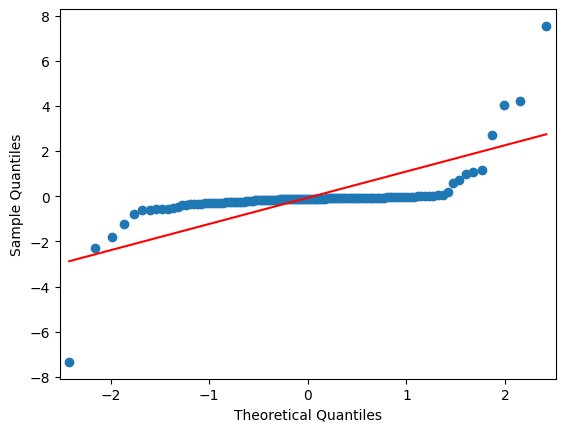

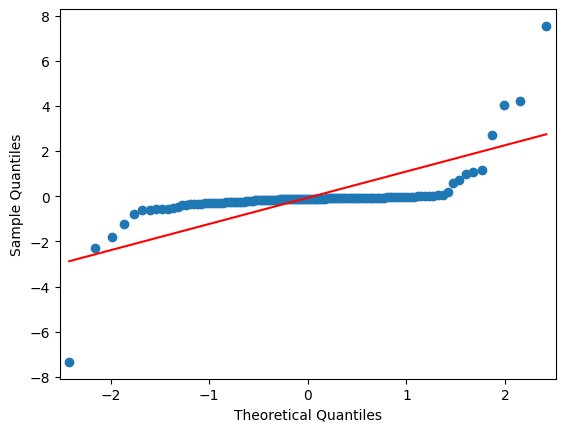

In [21]:
import statsmodels.graphics.gofplots as smg

# Create QQ plot of standardized residuals
smg.qqplot(standardized_residuals, line='s')

There is an issue with basic regression here; it is violating our linearity assumptions. We'll try a few transformations to see if we can fix it

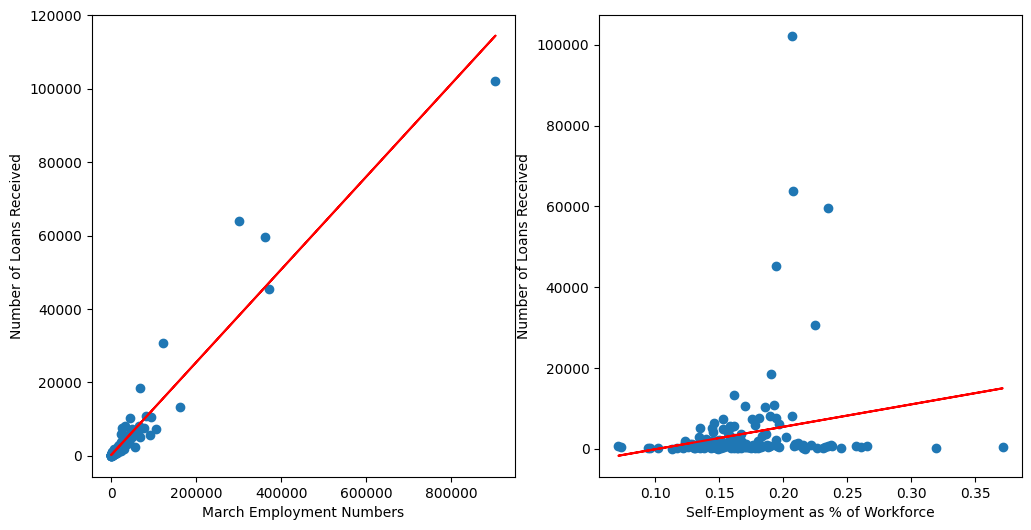

In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt

#check scatterplots of included variables to see what the issue might be 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot the first scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x.iloc[:, 0], y)
line = slope * x.iloc[:, 0] + intercept
ax1.scatter(x.iloc[:, 0], y)
ax1.plot(x.iloc[:, 0], line, color='red')
ax1.set_xlabel('March Employment Numbers')
ax1.set_ylabel('Number of Loans Received')

# Plot the second scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x.iloc[:, 1], y)
line = slope * x.iloc[:, 1] + intercept
ax2.scatter(x.iloc[:, 1], y)
ax2.plot(x.iloc[:, 1], line, color='red')
ax2.set_xlabel('Self-Employment as % of Workforce')
ax2.set_ylabel('Number of Loans Received')

# Show the plots
plt.show()

employment #s looks very linear, self-employment is obviously the issue here with a weird trend

In [30]:
# Apply Box-Cox transformation to 'Self-Employment' to see if it helps
x['Self-Employment as % of Workforce'], _ = stats.boxcox(x['Self-Employment as % of Workforce'] + 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2, random_state=85)

model_simple2 = LinearRegression().fit(X2_train, y2_train)

print('Coefficients:', model_simple2.coef_)
print('Intercept:', model_simple2.intercept_)

y2_pred = model_simple2.predict(X2_test)

print('R^2 score:', model_simple2.score(X2_test, y2_test))

Coefficients: [1.26084867e-01 5.17680630e+04]
Intercept: -5158.543918808777
R^2 score: 0.950681051408882


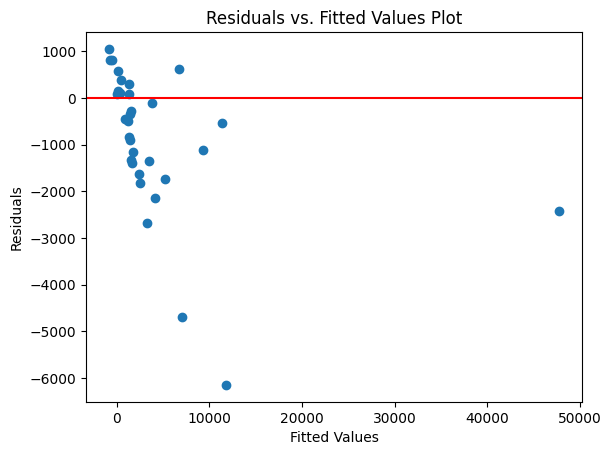

In [31]:
# Create a residuals vs. fitted values plot
residuals2 = y2_test - y2_pred


fig, ax = plt.subplots()
ax.scatter(y2_pred, residuals2)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

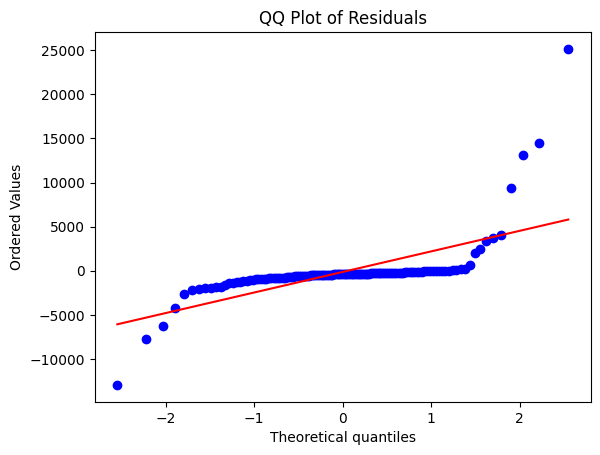

In [32]:
fig, ax = plt.subplots()
stats.probplot(residuals, plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

Ok they still look weird...this didn't really work